In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append('/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/src')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/data')
import py37_cplex2210 as cplex
from generator import *

In [3]:
%reload_ext autoreload
%autoreload 2
from frontal_algo_no_beta import * # Frontal

from SFW1 import * # P1 + SFW1
from SFW2 import * # P1 + SFW2
from CFW1 import * # P1/P2 + CFW1
from CFW2 import * # P1/P2 + CFW2
from CFW3 import * # P1/P2 + CFW3

from PR_SFW1 import * # P3 + SFW1
from PR_SFW2 import * # P3 + SFW2
from PR_CFW1 import * # P3 + CFW1
from PR_CFW2 import * # P3 + CFW2
from PR_CFW3 import * # P3 + CFW3

from PR_Robust import * # P3 + Robust
from tools import *

In [4]:
N_list=[50, 100,200, 500, 1000, 2000]

In [20]:
for N in N_list:
    np.random.seed(N)
    #instance_json(N)
    my_instance="../data/instance_"+str(N)+".json"
    frontal = Frontal(my_instance,actual_time)
    result,s_t_min,soc_max,optimal_value = frontal.Frontal_solve(actual_time)
    #optimal_value, epsilon_time=execute_frontal(frontal, actual_time,my_instance)
    #cplex_to_file(my_instance, epsilon_time ,optimal_value)


Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIQP Presolve eliminated 23942 rows and 360 columns.
MIQP Presolve added 1982 rows and 0 columns.
Aggregator did 4320 substitutions.
Reduced MIQP has 12804 rows, 17124 columns, and 42414 nonzeros.
Reduced MIQP has 4320 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 24 nonzeros.
Presolve time = 0.07 sec. (49.09 ticks)
Probing time = 0.01 sec. (4.23 ticks)
Tried aggregator 1 time.
Reduced MIQP has 12804 rows, 17124 columns, and 42414 nonzeros.
Reduced MIQP has 4320 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 24 nonzeros.
Presolve time = 0.03 sec. (17.48 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.01 sec. (4.15 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 t

In [18]:
frontal.affichage(result)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 10000
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 3488.0 	 -15000.0 	 19000.0 	 -512
1 	 3488.0 	 -15000.0 	 19000.0 	 -512
2 	 3488.0 	 -15000.0 	 19000.0 	 -512
3 	 3488.0 	 -15000.0 	 19000.0 	 -512
4 	 3488.0 	 -15000.0 	 19000.0 	 -512
5 	 3488.0 	 -15000.0 	 19000.0 	 -512
6 	 3488.0 	 -15000.0 	 19000.0 	 -512
7 	 3488.0 	 -15000.0 	 19000.0 	 -512
8 	 3488.0 	 -15000.0 	 19000.0 	 -512
9 	 3488.0 	 -15000.0 	 19000.0 	 -512
10 	 3488.0 	 -15000.0 	 19000.0 	 -512
11 	 3488.0 	 -15000.0 	 19000.0 	 -512
12 	 3488.0 	 -15000.0 	 19000.0 	 -512
13 	 3488.0 	 -15000.0 	 19000.0 	 -512
14 	 3488.0 	 -15000.0 	 19000.0 	 -512
15 	 3488.0 	 -15000.0 	 19000.0 	 -512
16 	 3488.0 	 -15000.0 	 19000.0 	 -512
17 	 3488.0 	 -15000.0 	 19000.0 	 -512
18 	 3488.0 	 -15000.0 	 19000.0 	 -512
19 	 3488.0 	 -15000.0 	 19000.0 	 -512
20 	 3488.0 	 -15000.0 	 19000.0 	 -5

In [7]:
data_CFW1 = []
data_CFW2 = []
data_CFW3 = []
data_SFW1 = []
data_SFW2 = []

data_x_cfw1 = []
data_x_cfw2 = []
data_x_cfw3 = []
data_x_sfw1 = []
data_x_sfw2 = []

time_CFW1 = []
time_CFW2 = []
time_CFW3 = []
time_SFW1 = []
time_SFW2 = []
for N in N_list:
    K=100
    nk=10
    n_pre=50
    my_instance="../data/instance_"+str(N)+".json"
    CFW1=Frank_Wolfe_Standard_v2(my_instance)
    CFW2=Frank_Wolfe_Standard_v3(my_instance)
    CFW3=Frank_Wolfe_Standard_v5(my_instance)
    SFW1=Frank_Wolfe_Stochastic(my_instance)
    SFW2=Frank_Wolfe_stochastique_gloutonne(my_instance)

    np.random.seed(0)
    x_bar_k_cfw1,df_cfw1, epsilon_time_cfw1=execute_algo(CFW1, actual_time,K,n_k,n_pre=n_pre)
    #x_bar_k_cfw1,df_cfw1 = CFW1.FW_st_solve(actual_time, analyse=True, K=K, nk=nk,n_pre=n_pre,optimize=False,gap_calculate=True)

    np.random.seed(0)
    x_bar_k_cfw2,df_cfw2, epsilon_time_cfw2=execute_algo(CFW2, actual_time,K,n_k,n_pre=n_pre)

    np.random.seed(0)
    x_bar_k_cfw3,df_cfw3, epsilon_time_cfw3=execute_algo(CFW3, actual_time,K,n_k,n_pre=n_pre)

    np.random.seed(0)
    x_bar_k_sfw1,df_sfw1, epsilon_time_sfw1=execute_algo(SFW1, actual_time,K,n_k,n_pre=0)

    np.random.seed(0)
    x_bar_k_sfw2,df_sfw2, epsilon_time_sfw2=execute_algo(SFW2, actual_time,K,n_k,n_pre=0)
    
    data_CFW1.append(df_cfw1)
    data_CFW2.append(df_cfw2)
    data_CFW3.append(df_cfw3)
    data_SFW1.append(df_sfw1)
    data_SFW2.append(df_sfw2)

    data_x_cfw1.append(x_bar_k_cfw1)
    data_x_cfw2.append(x_bar_k_cfw2)
    data_x_cfw3.append(x_bar_k_cfw3)
    data_x_sfw1.append(x_bar_k_sfw1)
    data_x_sfw2.append(x_bar_k_sfw2)

    time_CFW1.append(epsilon_time_cfw1)
    time_CFW2.append(epsilon_time_cfw2)
    time_CFW3.append(epsilon_time_cfw3)
    time_SFW1.append(epsilon_time_sfw1)
    time_SFW2.append(epsilon_time_sfw2)

Output is saved in file ../log/instance_50/CFW1_50_100_20230823-142652.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/CFW2_50_100_20230823-142719.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/CFW3_50_100_20230823-142805.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/SFW1_100_20230823-142839.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/SFW2_100_20230823-142952.txt


100%|██████████| 100/100 [00:20<00:00,  4.84iteration/s]


Output is saved in file ../log/instance_100/CFW1_50_100_20230823-143015.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/CFW2_50_100_20230823-143054.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/CFW3_50_100_20230823-143226.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/SFW1_100_20230823-143328.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/SFW2_100_20230823-143541.txt


100%|██████████| 100/100 [00:40<00:00,  2.46iteration/s]


Output is saved in file ../log/instance_200/CFW1_50_100_20230823-143626.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/CFW2_50_100_20230823-143740.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/CFW3_50_100_20230823-144034.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/SFW1_100_20230823-144244.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/SFW2_100_20230823-144753.txt


100%|██████████| 100/100 [02:17<00:00,  1.38s/iteration]


Output is saved in file ../log/instance_500/CFW1_50_100_20230823-145011.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/CFW2_50_100_20230823-145328.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/CFW3_50_100_20230823-150101.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/SFW1_100_20230823-150533.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/SFW2_100_20230823-151611.txt


100%|██████████| 100/100 [06:19<00:00,  3.80s/iteration]


Output is saved in file ../log/instance_1000/CFW1_50_100_20230823-152231.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/CFW2_50_100_20230823-152904.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/CFW3_50_100_20230823-154834.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/SFW1_100_20230823-160056.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/SFW2_100_20230823-162740.txt


100%|██████████| 100/100 [19:33<00:00, 11.73s/iteration] 


Output is saved in file ../log/instance_2000/CFW1_50_100_20230823-164714.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/CFW2_50_100_20230823-170106.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/CFW3_50_100_20230823-232117.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/SFW1_100_20230823-233847.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/SFW2_100_20230824-001739.txt


100%|██████████| 100/100 [47:52<00:00, 28.72s/iteration]  


In [3]:
data_CFW1 = []
data_CFW2 = []
data_CFW3 = []
data_SFW1 = []
data_SFW2 = []

data_x_cfw1 = []
data_x_cfw2 = []
data_x_cfw3 = []
data_x_sfw1 = []
data_x_sfw2 = []

time_CFW1 = []
time_CFW2 = []
time_CFW3 = []
time_SFW1 = []
time_SFW2 = []
N_list=[50, 100,200, 500, 1000, 2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    my_instance="../data/instance_"+str(N)+".json"
    CFW1=Frank_Wolfe_Standard_v2(my_instance)
    CFW2=Frank_Wolfe_Standard_v3(my_instance)
    CFW3=Frank_Wolfe_Standard_v5(my_instance)
    SFW1=Frank_Wolfe_Stochastic(my_instance)
    SFW2=Frank_Wolfe_stochastique_gloutonne(my_instance)

    """
    np.random.seed(0)
    x_bar_k_cfw1,df_cfw1, epsilon_time_cfw1=execute_algo(CFW1, actual_time,K,n_k,n_pre=n_pre)
    #x_bar_k_cfw1,df_cfw1 = CFW1.FW_st_solve(actual_time, analyse=True, K=K, nk=n_k,n_pre=n_pre,optimize=False,gap_calculate=True)

    np.random.seed(0)
    x_bar_k_cfw2,df_cfw2, epsilon_time_cfw2=execute_algo(CFW2, actual_time,K,n_k,n_pre=n_pre)

    np.random.seed(0)
    x_bar_k_cfw3,df_cfw3, epsilon_time_cfw3=execute_algo(CFW3, actual_time,K,n_k,n_pre=n_pre)
    
    np.random.seed(0)
    x_bar_k_sfw1,df_sfw1, epsilon_time_sfw1=execute_algo(SFW1, actual_time,K,n_k,n_pre=0)
    """
    np.random.seed(0)
    x_bar_k_sfw2,df_sfw2, epsilon_time_sfw2=execute_algo(SFW2, actual_time,K,n_k,n_pre=0,optimize=False)
    
    """
    data_CFW1.append(df_cfw1)
    data_CFW2.append(df_cfw2)
    data_CFW3.append(df_cfw3)
    
    data_SFW1.append(df_sfw1)"""
    
    data_SFW2.append(df_sfw2)

    """
    data_x_cfw1.append(x_bar_k_cfw1)
    data_x_cfw2.append(x_bar_k_cfw2)
    data_x_cfw3.append(x_bar_k_cfw3)
    data_x_sfw1.append(x_bar_k_sfw1)"""
    data_x_sfw2.append(x_bar_k_sfw2)
    
    """
    time_CFW1.append(epsilon_time_cfw1)
    time_CFW2.append(epsilon_time_cfw2)
    time_CFW3.append(epsilon_time_cfw3)
    time_SFW1.append(epsilon_time_sfw1)"""
    time_SFW2.append(epsilon_time_sfw2)

  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/SFW2_pb_original_100_20230830-122605.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/SFW2_pb_original_100_20230830-122622.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/SFW2_pb_original_100_20230830-122711.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/SFW2_pb_original_100_20230830-122907.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/SFW2_pb_original_100_20230830-123437.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/SFW2_pb_original_100_20230830-125113.txt


100%|██████████| 100/100 [40:37<00:00, 24.38s/iteration] 


In [6]:
data_CFW1_optimize = []
data_CFW2_optimize = []
data_CFW3_optimize = []
data_SFW1_optimize = []
data_SFW2_optimize = []

data_x_cfw1_optimize = []
data_x_cfw2_optimize = []
data_x_cfw3_optimize = []
data_x_sfw1_optimize = []
data_x_sfw2_optimize = []

time_CFW1_optimize = []
time_CFW2_optimize = []
time_CFW3_optimize = []
time_SFW1_optimize = []
time_SFW2_optimize = []
N_list=[50, 100,200, 500, 1000, 2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    my_instance="../data/instance_"+str(N)+".json"
    CFW1=Frank_Wolfe_Standard_v2(my_instance)
    CFW2=Frank_Wolfe_Standard_v3(my_instance)
    CFW3=Frank_Wolfe_Standard_v5(my_instance)
    SFW1=Frank_Wolfe_Stochastic(my_instance)
    SFW2=Frank_Wolfe_stochastique_gloutonne(my_instance)
    optimize=True
    np.random.seed(0)
    x_bar_k_cfw1,df_cfw1, epsilon_time_cfw1=execute_algo(CFW1, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=1)
    #x_bar_k_cfw1,df_cfw1 = CFW1.FW_st_solve(actual_time, analyse=True, K=K, nk=nk,n_pre=n_pre,optimize=False,gap_calculate=True)

    np.random.seed(0)
    x_bar_k_cfw2,df_cfw2, epsilon_time_cfw2=execute_algo(CFW2, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=1)

    np.random.seed(0)
    x_bar_k_cfw3,df_cfw3, epsilon_time_cfw3=execute_algo(CFW3, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=1)

    np.random.seed(0)
    x_bar_k_sfw1,df_sfw1, epsilon_time_sfw1=execute_algo(SFW1, actual_time,K,n_k,n_pre=0, optimize=optimize,pb=1)

    #np.random.seed(0)
    #x_bar_k_sfw2,df_sfw2, epsilon_time_sfw2=execute_algo(SFW2, actual_time,K,n_k,n_pre=0, optimize=optimize,pb=1)
    
    data_CFW1_optimize.append(df_cfw1)
    data_CFW2_optimize.append(df_cfw2)
    data_CFW3_optimize.append(df_cfw3)
    data_SFW1_optimize.append(df_sfw1)
    #data_SFW2_optimize.append(df_sfw2)

    data_x_cfw1_optimize.append(x_bar_k_cfw1)
    data_x_cfw2_optimize.append(x_bar_k_cfw2)
    data_x_cfw3_optimize.append(x_bar_k_cfw3)
    data_x_sfw1_optimize.append(x_bar_k_sfw1)
    #data_x_sfw2_optimize.append(x_bar_k_sfw2)

    time_CFW1_optimize.append(epsilon_time_cfw1)
    time_CFW2_optimize.append(epsilon_time_cfw2)
    time_CFW3_optimize.append(epsilon_time_cfw3)
    time_SFW1_optimize.append(epsilon_time_sfw1)
    #time_SFW2_optimize.append(epsilon_time_sfw2)
    

  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/CFW1_pb_booster_50_100_20230830-134605.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/CFW2_pb_booster_50_100_20230830-134627.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/CFW3_pb_booster_50_100_20230830-134706.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/SFW1_pb_booster_100_20230830-134748.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/CFW1_pb_booster_50_100_20230830-134835.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/CFW2_pb_booster_50_100_20230830-134912.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/CFW3_pb_booster_50_100_20230830-135023.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/SFW1_pb_booster_100_20230830-135133.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/CFW1_pb_booster_50_100_20230830-135241.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/CFW2_pb_booster_50_100_20230830-135355.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/CFW3_pb_booster_50_100_20230830-135554.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/SFW1_pb_booster_100_20230830-135743.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/CFW1_pb_booster_50_100_20230830-135905.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/CFW2_pb_booster_50_100_20230830-140117.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/CFW3_pb_booster_50_100_20230830-140540.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/SFW1_pb_booster_100_20230830-141001.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/CFW1_pb_booster_50_100_20230830-141236.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/CFW2_pb_booster_50_100_20230830-141857.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/CFW3_pb_booster_50_100_20230830-142746.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/SFW1_pb_booster_100_20230830-143749.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/CFW1_pb_booster_50_100_20230830-144405.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/CFW2_pb_booster_50_100_20230830-145427.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/CFW3_pb_booster_50_100_20230830-151312.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/SFW1_pb_booster_100_20230830-153302.txt


100%|██████████| 100/100 [12:04<00:00,  7.25s/iteration]


In [3]:
data_CFW1_reduced = []
data_CFW2_reduced = []
data_CFW3_reduced = []
data_SFW1_reduced = []
data_SFW2_reduced = []
data_Robust_reduced = []


data_x_cfw1_reduced = []
data_x_cfw2_reduced = []
data_x_cfw3_reduced = []
data_x_sfw1_reduced = []
data_x_sfw2_reduced = []
data_x_Robust_reduced = []


time_CFW1_reduced = []
time_CFW2_reduced = []
time_CFW3_reduced = []
time_SFW1_reduced = []
time_SFW2_reduced = []
time_Robust_reduced = []

N_list=[50, 100 ,200, 500, 1000, 2000]
#N_list=[200, 500, 1000, 2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    my_instance="../data/instance_"+str(N)+".json"

    analyse=True
    gap_calculate=True

    CFW1=Frank_Wolfe_Reduced_standard(my_instance)
    CFW2=Frank_Wolfe_Reduced_standard_v2(my_instance)
    CFW3=Frank_Wolfe_Reduced_standard_v3(my_instance)
    SFW1=Frank_Wolfe_Reduced(my_instance)
    SFW2=Frank_Wolfe_Reduced_glouton(my_instance)
    Robust=Frank_Wolfe_Reduced_Robust(my_instance)

    optimize=True

    np.random.seed(0)
    x_bar_k_cfw1,df_cfw1, epsilon_time_cfw1=execute_algo(CFW1, actual_time,K,n_k,n_pre=n_pre, optimize=optimize, pb=2)

    
    np.random.seed(0)
    x_bar_k_cfw2,df_cfw2, epsilon_time_cfw2=execute_algo(CFW2, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=2)
    
    np.random.seed(0)
    x_bar_k_cfw3,df_cfw3, epsilon_time_cfw3=execute_algo(CFW3, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=2)

    np.random.seed(0)
    x_bar_k_sfw1,df_sfw1, epsilon_time_sfw1=execute_algo(SFW1, actual_time,K,n_k,n_pre=0, optimize=optimize,pb=2)

    np.random.seed(0)
    x_bar_k_sfw2,df_sfw2, epsilon_time_sfw2=execute_algo(SFW2, actual_time,K,n_k,n_pre=0, optimize=optimize,pb=2)
    
    np.random.seed(0)
    x_bar_k_robust,df_robust, epsilon_robust=execute_algo(Robust, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=3)

    data_CFW1_reduced.append(df_cfw1)
    data_CFW2_reduced.append(df_cfw2)
    data_CFW3_reduced.append(df_cfw3)
    data_SFW1_reduced.append(df_sfw1)
    data_SFW2_reduced.append(df_sfw2)
    data_Robust_reduced.append(df_robust)

    data_x_cfw1_reduced.append(x_bar_k_cfw1)
    data_x_cfw2_reduced.append(x_bar_k_cfw2)
    
    data_x_cfw3_reduced.append(x_bar_k_cfw3)
    data_x_sfw1_reduced.append(x_bar_k_sfw1)
    data_x_sfw2_reduced.append(x_bar_k_sfw2)
    data_x_Robust_reduced.append(x_bar_k_robust)

    
    time_CFW1_reduced.append(epsilon_time_cfw1)
    time_CFW2_reduced.append(epsilon_time_cfw2)
    time_CFW3_reduced.append(epsilon_time_cfw3)
    time_SFW1_reduced.append(epsilon_time_sfw1)
    time_SFW2_reduced.append(epsilon_time_sfw2)
    time_Robust_reduced.append(epsilon_robust)

  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_CFW1_pb_reduit_50_100_20230906-224358.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_CFW2_pb_reduit_50_100_20230906-224429.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_CFW3_pb_reduit_50_100_20230906-224618.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_SFW1_pb_reduit_100_20230906-224649.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_SFW2_pb_reduit_100_20230906-224747.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_Robust_pb_reduit_50_100_20230906-224920.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_CFW1_pb_reduit_50_100_20230906-224932.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_CFW2_pb_reduit_50_100_20230906-225008.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_CFW3_pb_reduit_50_100_20230906-225138.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_SFW1_pb_reduit_100_20230906-225207.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_SFW2_pb_reduit_100_20230906-225308.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_Robust_pb_reduit_50_100_20230906-225628.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_CFW1_pb_reduit_50_100_20230906-225707.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_CFW2_pb_reduit_50_100_20230906-225852.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_CFW3_pb_reduit_50_100_20230906-230134.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_SFW1_pb_reduit_100_20230906-230250.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_SFW2_pb_reduit_100_20230906-230509.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_Robust_pb_reduit_50_100_20230906-231351.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_CFW1_pb_reduit_50_100_20230906-231508.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_CFW2_pb_reduit_50_100_20230906-231840.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_CFW3_pb_reduit_50_100_20230906-232527.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_SFW1_pb_reduit_100_20230906-232846.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_SFW2_pb_reduit_100_20230906-233351.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_Robust_pb_reduit_50_100_20230906-235050.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_CFW1_pb_reduit_50_100_20230906-235350.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_CFW2_pb_reduit_50_100_20230907-000340.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_CFW3_pb_reduit_50_100_20230907-001711.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_SFW1_pb_reduit_100_20230907-002424.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_SFW2_pb_reduit_100_20230907-003310.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_Robust_pb_reduit_50_100_20230907-010049.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_CFW1_pb_reduit_50_100_20230907-010618.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_CFW2_pb_reduit_50_100_20230907-011726.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_CFW3_pb_reduit_50_100_20230907-013845.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_SFW1_pb_reduit_100_20230907-014745.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_SFW2_pb_reduit_100_20230907-020005.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_Robust_pb_reduit_50_100_20230907-030135.txt


100%|██████████| 100/100 [18:58<00:00, 11.38s/iteration] 


In [26]:
N_list=[50]
#N_list=[200, 500, 1000, 2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    my_instance="../data/instance_"+str(N)+".json"

    analyse=True
    gap_calculate=True
    optimize=True
    CFW3=Frank_Wolfe_Reduced_standard_v3(my_instance)
    x_bar_x,df_x=CFW3.solve(actual_time, K=K, nk=n_k, analyse=analyse, optimize=optimize,gap_calculate=gap_calculate,)

  0%|          | 0/100 [00:00<?, ?iteration/s]

=========iteration :  0 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [-400. -400. -400. -400. -400. -400. -400. -400. -400. -400.]
0.0 0.0 0.0
gap_primal_dual 0.0
after 619597.4540558042
=========iteration :  1 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [   0.    0.    0.    0.    0.    0. -100.  -70.  -70.  -70.]
0.0 4335000.0 0.0
gap_primal_dual 4335000.0
after 619597.4540558042
=========iteration :  2 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [   0.    0.    0.    0.    0.    0. -100.  -70.  -70.  -70.]
0.0 2787000.0 0.0
gap_primal_dual 2787000.0
after 371729.08386568265
=========iteration :  3 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [   0.          -16.            0.          -34.          -34.
 -110.53173839    0.            0.            0.            0.        ]
0.0 2684580.6435595527 0.0
gap_primal_dual 2684580.6435595527
after 371729.08386568265
=========iteration :  4 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [   0.          -16.    

 10%|█         | 10/100 [00:06<00:54,  1.64iteration/s]

lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0.         -28.         -46.39536674 -40.         -18.37724356
 -23.26844495   0.         -16.         -16.         -16.        ]
0.0 2251964.8315778887 0.0
gap_primal_dual 2251964.8315778887
after 156689.2957179548
=========iteration :  8 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0.         -28.         -46.39536674 -40.         -18.37724356
 -23.26844495   0.         -16.         -16.         -16.        ]
0.0 2251964.8315778887 0.0
gap_primal_dual 2251964.8315778887
after 156689.2957179548
=========iteration :  9 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0.         -28.         -46.39536674 -40.         -18.37724356
 -23.26844495   0.         -16.         -16.         -16.        ]
0.0 2251964.8315778887 0.0
gap_primal_dual 2251964.8315778887
after 156689.2957179548
=========iteration :  10 ===========
lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0.         -28.         -46.39536674 -40.         -18.37724356
 -23.2684449

 20%|██        | 20/100 [00:09<00:36,  2.18iteration/s]

lambda [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0.           0.          -9.33872619  -4.         -11.22414511
   0.         -16.         -28.           0.         -10.        ]
0.0 842093.9236287513 0.0
gap_primal_dual 842093.9236287513
after 32203.658745361452
=========iteration :  20 ===========
score 32203.658745361452


TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'float'

In [4]:
data_CFW1 = []
data_CFW2 = []
data_CFW3 = []
data_SFW1 = []
data_SFW2 = []

data_CFW1_optimize = []
data_CFW2_optimize = []
data_CFW3_optimize = []
data_SFW1_optimize = []
data_SFW2_optimize = []

data_CFW1_reduced = []
data_CFW2_reduced = []
data_CFW3_reduced = []
data_SFW1_reduced = []
data_SFW2_reduced = []
data_Robust_reduced = []


N_list=[50, 100,200, 500, 1000, 2000]
"""
for nb in N_list:
    file_CFW1, file_CFW2, file_CFW3, file_SFW1, file_SFW2,_=show_file_list_by_instance(1, "../data/instance_"+str(nb)+".json")
    data_CFW1.append(choose_and_read(file_CFW1,0))
    data_CFW2.append(choose_and_read(file_CFW2,0))
    data_CFW3.append(choose_and_read(file_CFW3,0))
    data_SFW1.append(choose_and_read(file_SFW1,0))
    data_SFW2.append(choose_and_read(file_SFW2,0))
    print("==================================")


for nb in N_list:
    file_CFW1_optimize, file_CFW2_optimize, file_CFW3_optimize, file_SFW1_optimize, file_SFW2_optimize,_=show_file_list_by_instance(2, "../data/instance_"+str(nb)+".json")
    data_CFW1_optimize.append(choose_and_read(file_CFW1_optimize,0))
    data_CFW2_optimize.append(choose_and_read(file_CFW2_optimize,0))
    data_CFW3_optimize.append(choose_and_read(file_CFW3_optimize,0))
    data_SFW1_optimize.append(choose_and_read(file_SFW1_optimize,0))
    data_SFW2_optimize.append(choose_and_read(file_SFW2_optimize,0))
    print("==================================")
"""

for nb in N_list:
    file_CFW1_reduced, file_CFW2_reduced, file_CFW3_reduced, file_SFW1_reduced, file_SFW2_reduced,file_robuste_reduced=show_file_list_by_instance(3, "../data/instance_"+str(nb)+".json")
    data_CFW1_reduced.append(choose_and_read(file_CFW1_reduced,0))
    data_CFW2_reduced.append(choose_and_read(file_CFW2_reduced,0))
    data_CFW3_reduced.append(choose_and_read(file_CFW3_reduced,0))
    data_SFW1_reduced.append(choose_and_read(file_SFW1_reduced,0))
    data_SFW2_reduced.append(choose_and_read(file_SFW2_reduced,0))
    data_Robust_reduced.append(choose_and_read(file_robuste_reduced,0))
    print("==================================")

/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/result/pb_reduced/instance_50
PR_SFW2_20_20230906-224920.json
PR_SFW1_20_20230906-224747.json
.DS_Store
PR_CFW1_50_100_20230906-224429.json
PR_CFW3_50_100_20230906-224649.json
PR_CFW2_50_100_20230906-224618.json
PR_Robust_50_20230906-224932.json
/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/result/pb_reduced/instance_100
PR_SFW2_20_20230906-225628.json
.DS_Store
PR_CFW3_50_100_20230906-225207.json
PR_Robust_50_20230906-225707.json
PR_CFW1_50_100_20230906-225008.json
PR_CFW2_50_100_20230906-225138.json
PR_SFW1_20_20230906-225308.json
/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/result/pb_reduced/instance_200
PR_CFW1_50_100_20230906-225852.json
.DS_Store
PR_Robust_50_20230906-231508.json
PR_SFW1_20_20230906-230508.json
PR_CFW2_50_100_20230906-230134.json
PR_CFW3_50_100_20230906-230250.json
PR_SFW2_20_20230906-231351.json
/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/result/pb_reduced/instance_500
.DS_Store
PR_CFW2_50_100_

In [7]:
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    np.random.seed(0)
    my_instance="../data/instance_"+str(N)+".json"
    CFW2=Frank_Wolfe_Standard_v3(my_instance)
    """analyse=True
    optimize=False
    gap_calculate=True
    CFW2.solve(actual_time, K=K, nk=n_k,n_pre=50, analyse=analyse, optimize=optimize,gap_calculate=gap_calculate)"""
    x_bar_k, df, epsilon_time=execute_algo(CFW2, actual_time,K,n_k,n_pre=50)

Output is saved in file ../log/instance_500/CFW2_50_100_20230826-043433.txt


100%|██████████| 100/100 [05:36<00:00,  3.36s/iteration]


In [24]:
N_list=[2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=50
    np.random.seed(0)
    my_instance="../data/instance_"+str(N)+".json"
    SFW2=Frank_Wolfe_stochastique_gloutonne(my_instance)
    """analyse=True
    optimize=False
    gap_calculate=True
    CFW2.solve(actual_time, K=K, nk=n_k,n_pre=50, analyse=analyse, optimize=optimize,gap_calculate=gap_calculate)"""
    x_bar_k, df, epsilon_time=execute_algo(SFW2, actual_time,K,n_k,n_pre=0)

  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/SFW2_100_20230827-154258.txt


100%|██████████| 100/100 [1:41:14<00:00, 60.75s/iteration]  


In [66]:
for N in range(N_list):
    cf2_model=Frank_Wolfe_Standard_v3("../data/instance_500.json")
    #data_CFW2[0]["c_bl"][0][100]
    x_bar_k=data_CFW2[0]
    t=0
    filtered_df = df[df["k"] == 99]
    x={"c_bl":np.array(x_bar_k["c_bl"][99]),"d_bl":np.array(x_bar_k["d_bl"][99]),"c_up":np.array(x_bar_k["c_up"][99]),"d_up":np.array(x_bar_k["d_up"][99]),"s_bl":np.array(x_bar_k["s_bl"][99]),"s_up":np.array(x_bar_k["s_up"][99])}
    #print(filtered_df["c_bl"][99])
    #np.sum([np.array(x_bar_k["c_bl"][99][t]) - np.array(x_bar_k["d_bl"][i][t]) for i in range(500)])
    cf2_model.affichage(x)
    #print(sample_c_bl[0][1])

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 10000
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 8739.0 	 -11261.0 	 20000.0 	 0
1 	 10089.0 	 -9911.0 	 20000.0 	 0
2 	 8427.0 	 -11573.0 	 20000.0 	 0
3 	 7233.0 	 -12767.0 	 20000.0 	 0
4 	 7605.0 	 -12395.0 	 20000.0 	 0
5 	 9370.0 	 -10630.0 	 20000.0 	 0
6 	 7449.0 	 -12551.0 	 20000.0 	 0
7 	 6276.0 	 -13724.0 	 20000.0 	 0
8 	 8504.0 	 -11496.0 	 20000.0 	 0
9 	 10202.0 	 -9798.0 	 20000.0 	 0
------------------------------------------------------
f_val: 0.00016254627055201635 neg_pos_part: 0 cost_electricity: 2097.3454662913873 soc: 0.0
value of the objective function: 2097.345628837658
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 30000.0 	
S_i_min: [    0.             0.             0.             0.
     0.           277.79110232  4027.791

/Users/xinyuhuangmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6


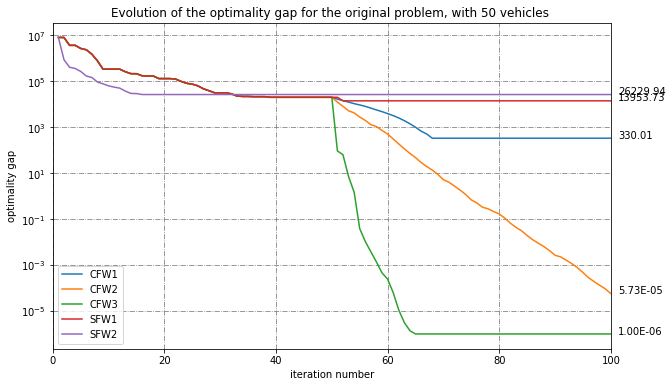

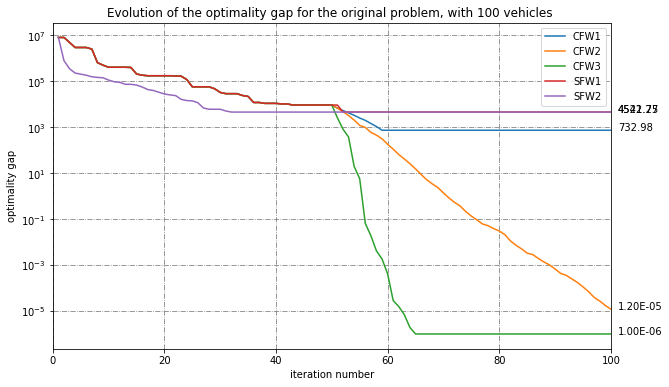

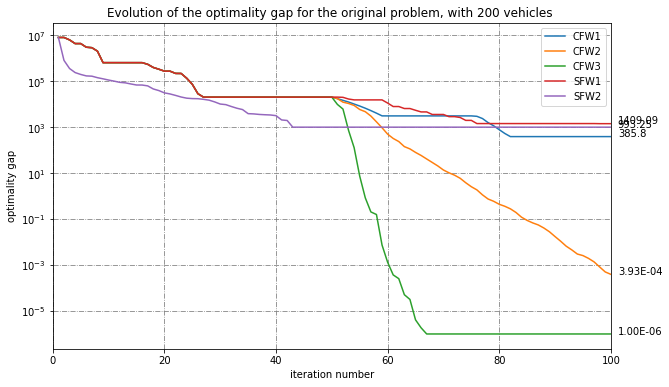

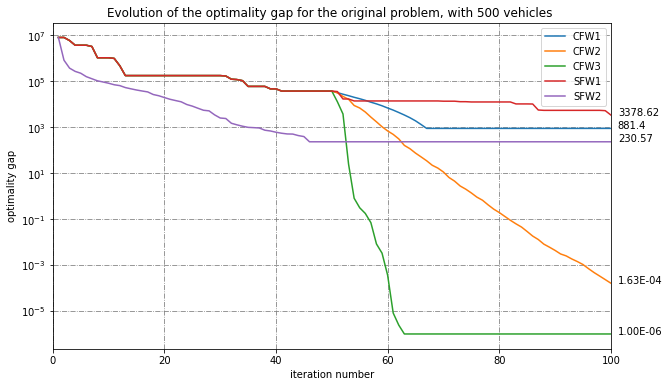

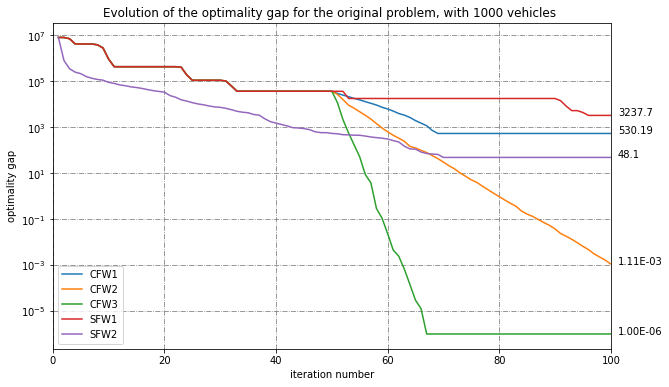

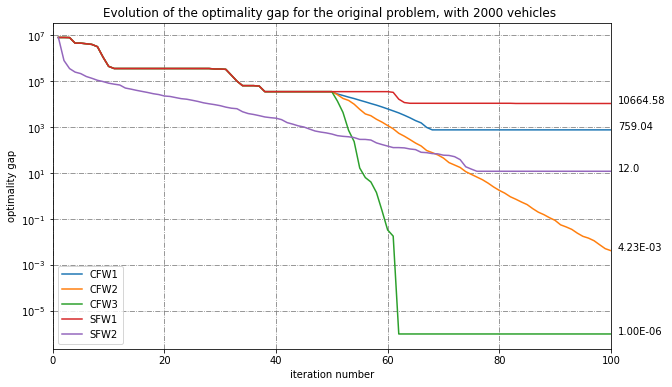

In [29]:

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1[cpt]["best_score"][99],data_CFW2[cpt]["best_score"][99],data_CFW3[cpt]["best_score"][99],data_SFW1[cpt]["best_score"][99],data_SFW2[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    plt.yscale('log')
    points_CFW1=[x if x>1e-6 else 1e-6 for x in data_CFW1[cpt]["best_score"]-opt_val ]
    points_CFW2=[x if x>1e-6 else 1e-6 for x in data_CFW2[cpt]["best_score"]-opt_val ]
    points_CFW3=[x if x>1e-6 else 1e-6 for x in data_CFW3[cpt]["best_score"]-opt_val ]
    points_SFW1=[x if x>1e-6 else 1e-6 for x in data_SFW1[cpt]["best_score"]-opt_val ]
    points_SFW2=[x if x>1e-6 else 1e-6 for x in data_SFW2[cpt]["best_score"]-opt_val ]
    plt.plot([j for j in range(1,101)],points_CFW1,label="CFW1")
    plt.plot([j for j in range(1,101)],points_CFW2,label="CFW2")
    plt.plot([j for j in range(1,101)],points_CFW3,label="CFW3")
    plt.plot([j for j in range(1,101)],points_SFW1,label="SFW1")
    plt.plot([j for j in range(1,101)],points_SFW2,label="SFW2")
    plt.grid(ls="-.", color='0.5')
    points=[100]*6
    final=[points_CFW1[99],points_CFW2[99],points_CFW3[99],points_SFW1[99],points_SFW2[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        plt.annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    plt.title("Evolution of the optimality gap for the original problem, with "+str(i)+ " vehicles ")
    plt.xlabel("iteration number")
    plt.ylabel("optimality gap")
    plt.legend(loc='upper right', bbox_to_anchor=(-5, 0))
    plt.xlim(left=0, right=100)
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.legend()
    plt.savefig("./result_zip/original"+str(i)+".png",figsize=(20, 20), dpi=300)
    plt.show()
    cpt+=1


/Users/xinyuhuangmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6


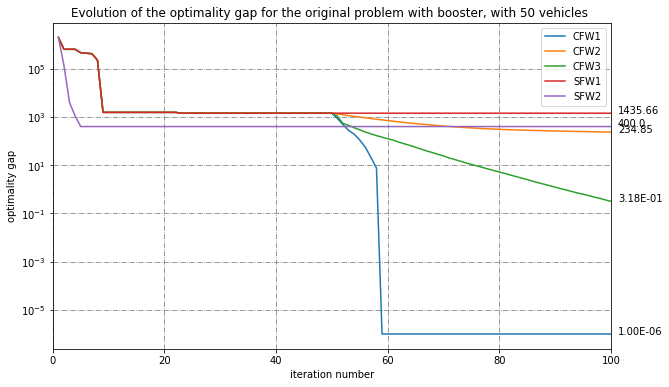

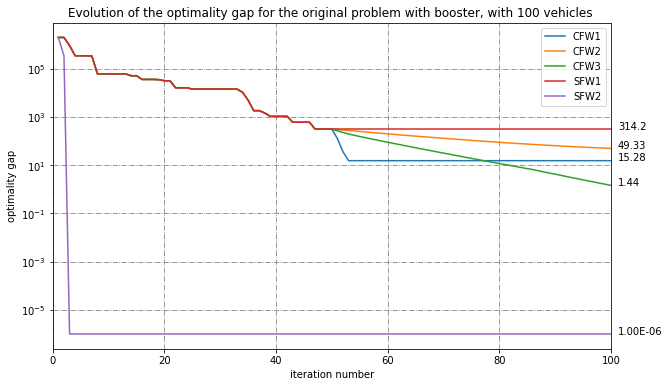

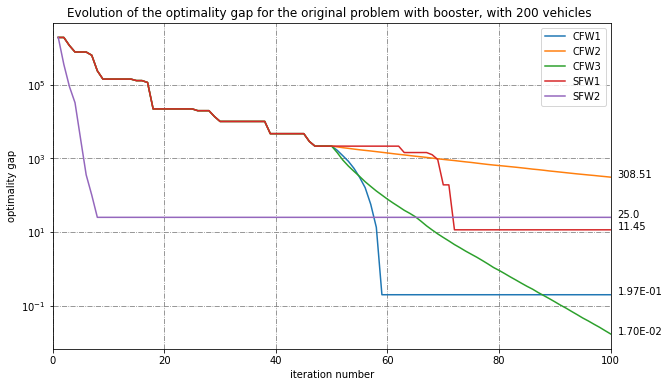

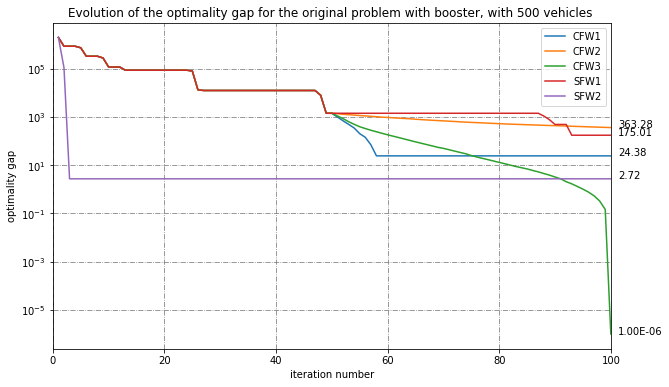

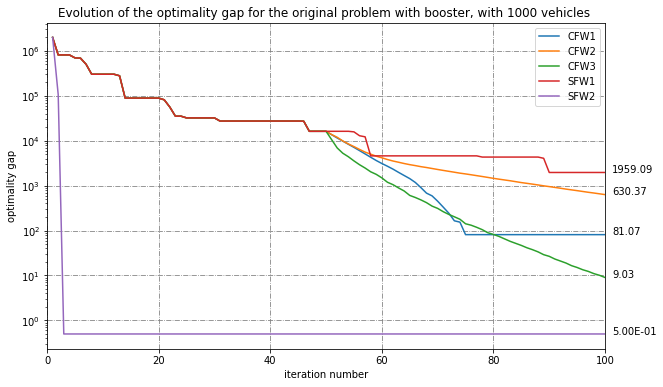

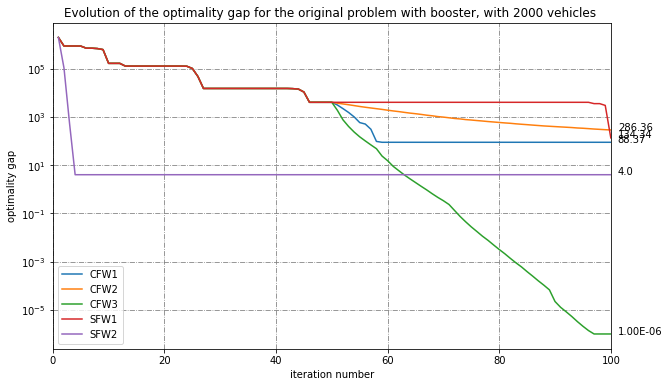

In [30]:
cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_optimize[cpt]["best_score"][99],data_CFW2_optimize[cpt]["best_score"][99],data_CFW3_optimize[cpt]["best_score"][99],data_SFW1_optimize[cpt]["best_score"][99],data_SFW2_optimize[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    plt.yscale('log')
    points_CFW1_optimize=[x if x>1e-6 else 1e-6 for x in data_CFW1_optimize[cpt]["best_score"]-opt_val ]
    points_CFW2_optimize=[x if x>1e-6 else 1e-6 for x in data_CFW2_optimize[cpt]["best_score"]-opt_val ]
    points_CFW3_optimize=[x if x>1e-6 else 1e-6 for x in data_CFW3_optimize[cpt]["best_score"]-opt_val ]
    points_SFW1_optimize=[x if x>1e-6 else 1e-6 for x in data_SFW1_optimize[cpt]["best_score"]-opt_val ]
    points_SFW2_optimize=[x if x>1e-6 else 1e-6 for x in data_SFW2_optimize[cpt]["best_score"]-opt_val ]
    plt.plot([j for j in range(1,101)],points_CFW1_optimize,label="CFW1")
    plt.plot([j for j in range(1,101)],points_CFW2_optimize,label="CFW2")
    plt.plot([j for j in range(1,101)],points_CFW3_optimize,label="CFW3")
    plt.plot([j for j in range(1,101)],points_SFW1_optimize,label="SFW1")
    plt.plot([j for j in range(1,101)],points_SFW2_optimize,label="SFW2")
    plt.grid(ls="-.", color='0.5')
    points=[100]*6
    final=[points_CFW1_optimize[99],points_CFW2_optimize[99],points_CFW3_optimize[99],points_SFW1_optimize[99],points_SFW2_optimize[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        plt.annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    plt.title("Evolution of the optimality gap for the original problem with booster, with "+str(i)+ " vehicles ")
    plt.xlabel("iteration number")
    plt.ylabel("optimality gap")
    plt.legend(loc='upper right', bbox_to_anchor=(-5, 0))
    plt.xlim(left=0, right=100)
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.savefig("./result_zip/optimized"+str(i)+".png",figsize=(20, 20), dpi=300)
    plt.show()
    cpt+=1


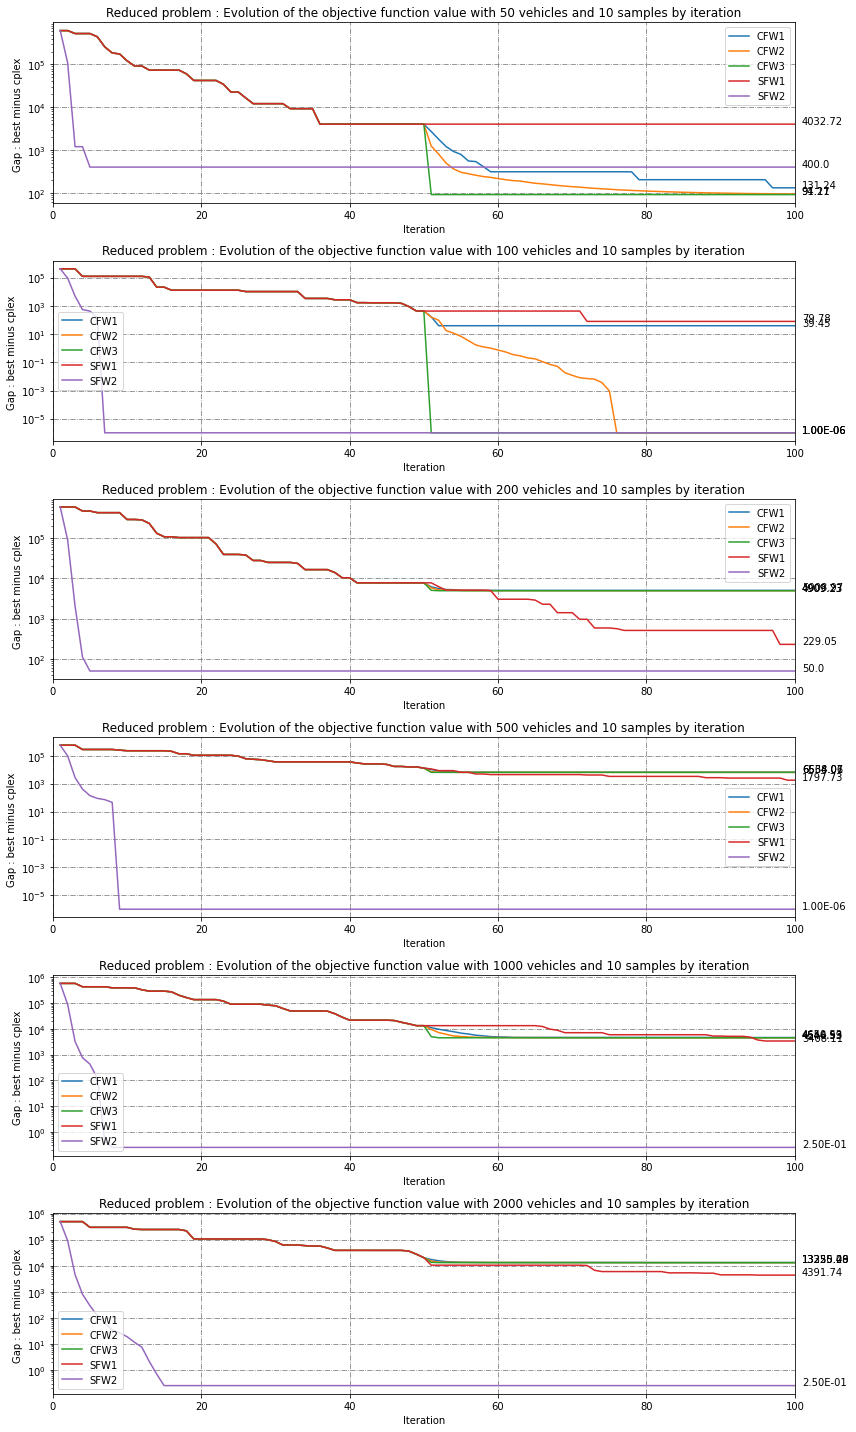

In [11]:
fig, axes = plt.subplots(6,1, figsize=(12, 20 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_reduced[cpt]["best_score"][99],data_CFW2_reduced[cpt]["best_score"][99],data_CFW3_reduced[cpt]["best_score"][99],data_SFW1_reduced[cpt]["best_score"][99],data_SFW2_reduced[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    axes[cpt].set_yscale('log')
    points_CFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW1_reduced[cpt]["best_score"]-opt_val ]
    points_CFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW2_reduced[cpt]["best_score"]-opt_val ]
    points_CFW3_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW3_reduced[cpt]["best_score"]-opt_val ]
    points_SFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW1_reduced[cpt]["best_score"]-opt_val ]
    points_SFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW2_reduced[cpt]["best_score"]-opt_val ]
    axes[cpt].plot([j for j in range(1,101)],points_CFW1_reduced,label="CFW1")
    axes[cpt].plot([j for j in range(1,101)],points_CFW2_reduced,label="CFW2")
    axes[cpt].plot([j for j in range(1,101)],points_CFW3_reduced,label="CFW3")
    axes[cpt].plot([j for j in range(1,101)],points_SFW1_reduced,label="SFW1")
    axes[cpt].plot([j for j in range(1,101)],points_SFW2_reduced,label="SFW2")
    axes[cpt].grid(ls="-.", color='0.5')
    points=[100]*5
    final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        axes[cpt].annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    axes[cpt].set_title("Reduced problem : Evolution of the objective function value with "+str(i)+" vehicles and "+str(10)+" samples by iteration")
    axes[cpt].set_xlabel("Iteration")
    axes[cpt].set_ylabel("Gap : best minus cplex ")
    axes[cpt].set_xlim(left=0, right=100)
    axes[cpt].legend()

    cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

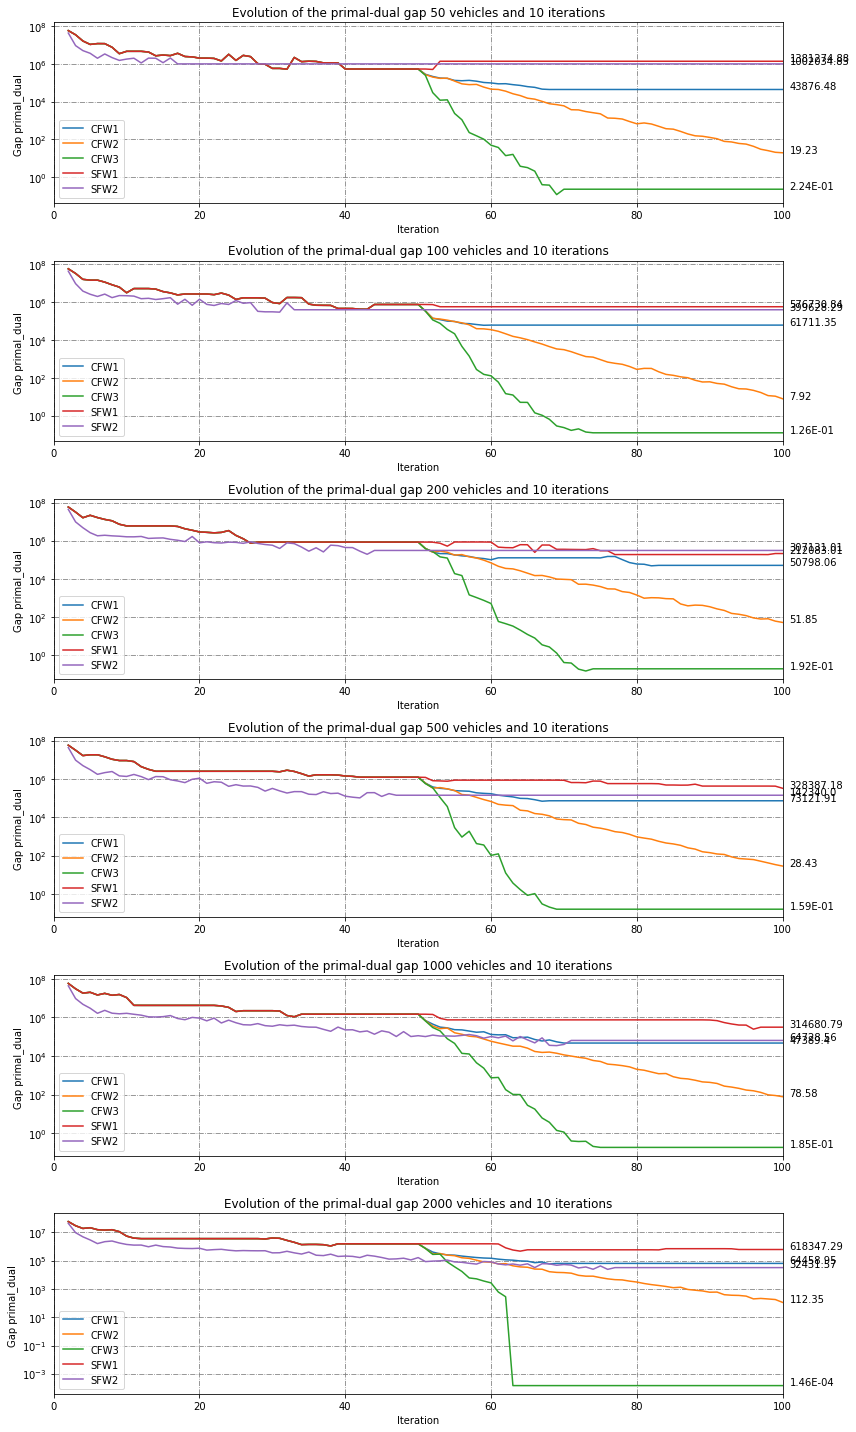

In [20]:
fig, axes = plt.subplots(6,1, figsize=(12, 20 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    #axes[cpt].yscale("log")
    axes[cpt].set_yscale('log')
    axes[cpt].plot([j for j in range(2,101)],data_CFW1[cpt]["gap_primal_dual"][1:],label="CFW1")
    axes[cpt].plot([j for j in range(2,101)],data_CFW2[cpt]["gap_primal_dual"][1:],label="CFW2")
    axes[cpt].plot([j for j in range(2,101)],data_CFW3[cpt]["gap_primal_dual"][1:],label="CFW3")
    axes[cpt].plot([j for j in range(2,101)],data_SFW1[cpt]["gap_primal_dual"][1:],label="SFW1")
    axes[cpt].plot([j for j in range(2,101)],data_SFW2[cpt]["gap_primal_dual"][1:],label="SFW2")
    axes[cpt].set_title("Evolution of the primal-dual gap "+str(i)+" vehicles and "+str(10)+" iterations")
    axes[cpt].grid(ls="-.", color='0.5')
    points=[100]*5
    final=[data_CFW1[cpt]["gap_primal_dual"][99],data_CFW2[cpt]["gap_primal_dual"][99],data_CFW3[cpt]["gap_primal_dual"][99],data_SFW1[cpt]["gap_primal_dual"][99],data_SFW2[cpt]["gap_primal_dual"][99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        axes[cpt].annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    axes[cpt].set_xlabel("Iteration")
    axes[cpt].set_ylabel("Gap primal_dual ")
    axes[cpt].set_xlim(left=0, right=100)
    axes[cpt].legend()

    cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

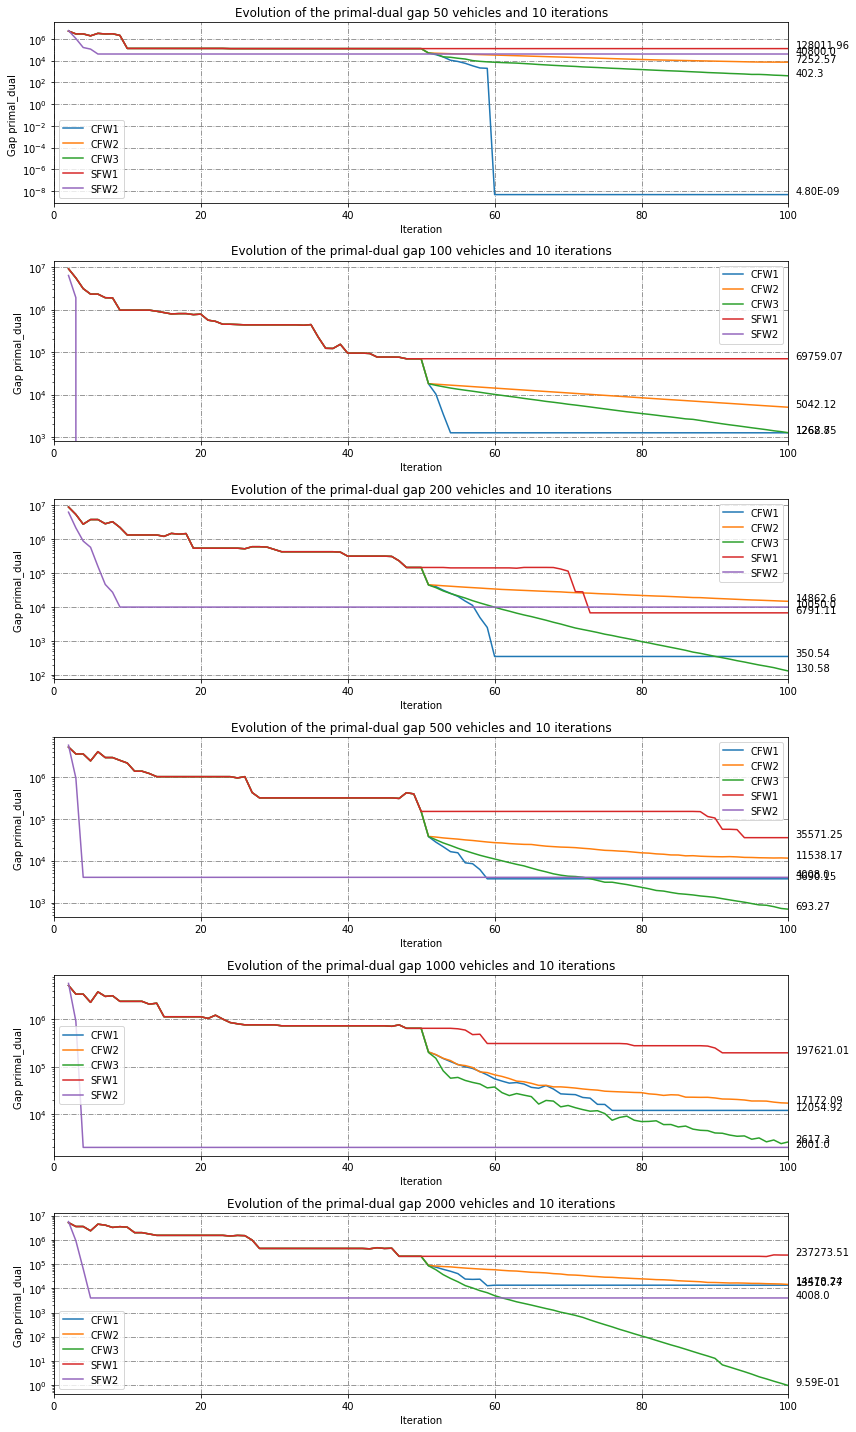

In [24]:


fig, axes = plt.subplots(6,1, figsize=(12, 20 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    #axes[cpt].yscale("log")
    axes[cpt].set_yscale('log')
    axes[cpt].plot([j for j in range(2,101)],data_CFW1_optimize[cpt]["gap_primal_dual"][1:],label="CFW1")
    axes[cpt].plot([j for j in range(2,101)],data_CFW2_optimize[cpt]["gap_primal_dual"][1:],label="CFW2")
    axes[cpt].plot([j for j in range(2,101)],data_CFW3_optimize[cpt]["gap_primal_dual"][1:],label="CFW3")
    axes[cpt].plot([j for j in range(2,101)],data_SFW1_optimize[cpt]["gap_primal_dual"][1:],label="SFW1")
    axes[cpt].plot([j for j in range(2,101)],data_SFW2_optimize[cpt]["gap_primal_dual"][1:],label="SFW2")
    axes[cpt].set_title("Evolution of the primal-dual gap "+str(i)+" vehicles and "+str(10)+" iterations")
    axes[cpt].grid(ls="-.", color='0.5')
    points=[100]*5
    final=[data_CFW1_optimize[cpt]["gap_primal_dual"][99],data_CFW2_optimize[cpt]["gap_primal_dual"][99],data_CFW3_optimize[cpt]["gap_primal_dual"][99],data_SFW1_optimize[cpt]["gap_primal_dual"][99],data_SFW2_optimize[cpt]["gap_primal_dual"][99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        axes[cpt].annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    axes[cpt].set_xlabel("Iteration")
    axes[cpt].set_ylabel("Gap primal_dual ")
    axes[cpt].set_xlim(left=0, right=100)
    axes[cpt].legend()

    cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

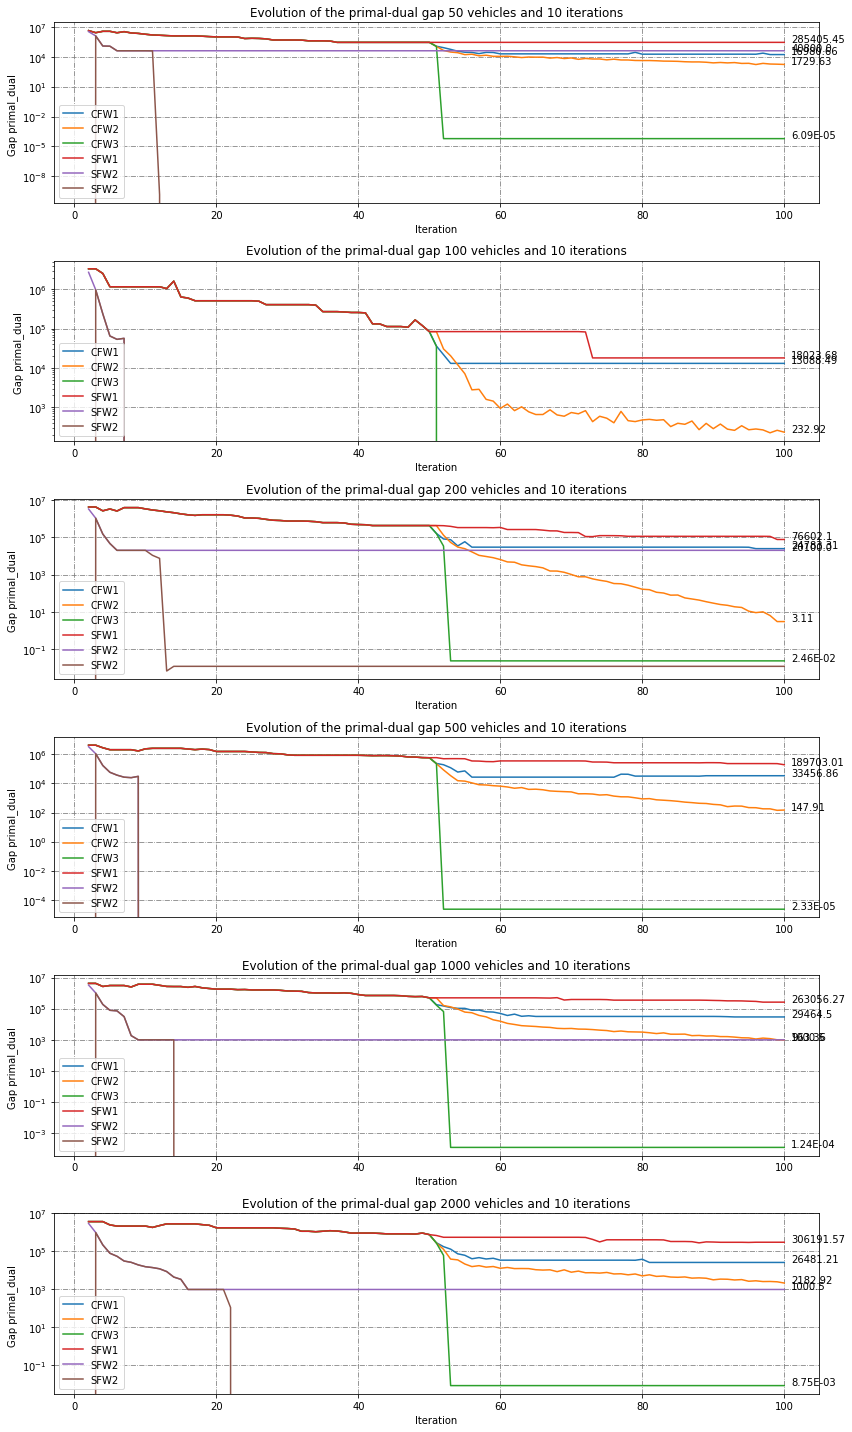

In [8]:
fig, axes = plt.subplots(6,1, figsize=(12,20 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    #axes[cpt].yscale("log")
    axes[cpt].set_yscale('log')
    axes[cpt].plot([j for j in range(2,101)],data_CFW1_reduced[cpt]["gap_primal_dual"][1:],label="CFW1")
    axes[cpt].plot([j for j in range(2,101)],data_CFW2_reduced[cpt]["gap_primal_dual"][1:],label="CFW2")
    axes[cpt].plot([j for j in range(2,101)],data_CFW3_reduced[cpt]["gap_primal_dual"][1:],label="CFW3")
    axes[cpt].plot([j for j in range(2,101)],data_SFW1_reduced[cpt]["gap_primal_dual"][1:],label="SFW1")
    axes[cpt].plot([j for j in range(2,101)],data_SFW2_reduced[cpt]["gap_primal_dual"][1:],label="SFW2")
    axes[cpt].plot([j for j in range(2,101)],data_Robust_reduced[cpt]["gap_primal_dual"][1:],label="Robust")
    axes[cpt].grid(ls="-.", color='0.5')
    points=[100]*5
    final=[data_CFW1_reduced[cpt]["gap_primal_dual"][99],data_CFW2_reduced[cpt]["gap_primal_dual"][99],data_CFW3_reduced[cpt]["gap_primal_dual"][99],data_SFW1_reduced[cpt]["gap_primal_dual"][99],data_SFW2_reduced[cpt]["gap_primal_dual"][99],data_Robust_reduced[cpt]["gap_primal_dual"][99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        axes[cpt].annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    axes[cpt].set_title("Evolution of the primal-dual gap "+str(i)+" vehicles and "+str(10)+" iterations")
    axes[cpt].set_xlabel("Iteration")
    axes[cpt].set_ylabel("Gap primal_dual ")
    axes[cpt].legend()

    cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [3]:
from PR_Robust import *

In [4]:
data_Robust_reduced = []

data_x_Robust_reduced = []

time_Robust_reduced = []
N_list=[50, 100 ,200, 500, 1000, 2000]
#N_list=[200, 500, 1000, 2000]
for N in N_list:
    K=100
    n_k=10
    n_pre=20
    my_instance="../data/instance_"+str(N)+".json"

    Robust=Frank_Wolfe_Reduced_Robust(my_instance)
    analyse=True
    gap_calculate=True
    optimize=True
    np.random.seed(0)
    x_bar_k_robust,df_robust, epsilon_robust=execute_algo(Robust, actual_time,K,n_k,n_pre=n_pre, optimize=optimize,pb=3)
    data_Robust_reduced.append(df_robust)
    
    data_x_Robust_reduced.append(x_bar_k_robust)

    """data_x_cfw1_reduced.append(x_bar_k_cfw1)"""
    time_Robust_reduced.append(epsilon_robust)

  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_50/PR_Robust_pb_reduit_20_100_20230904-211047.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_100/PR_Robust_pb_reduit_20_100_20230904-211055.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_200/PR_Robust_pb_reduit_20_100_20230904-211111.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_500/PR_Robust_pb_reduit_20_100_20230904-211143.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_1000/PR_Robust_pb_reduit_20_100_20230904-211335.txt


  0%|          | 0/100 [00:00<?, ?iteration/s]

Output is saved in file ../log/instance_2000/PR_Robust_pb_reduit_20_100_20230904-211854.txt


100%|██████████| 100/100 [18:03<00:00, 10.84s/iteration] 


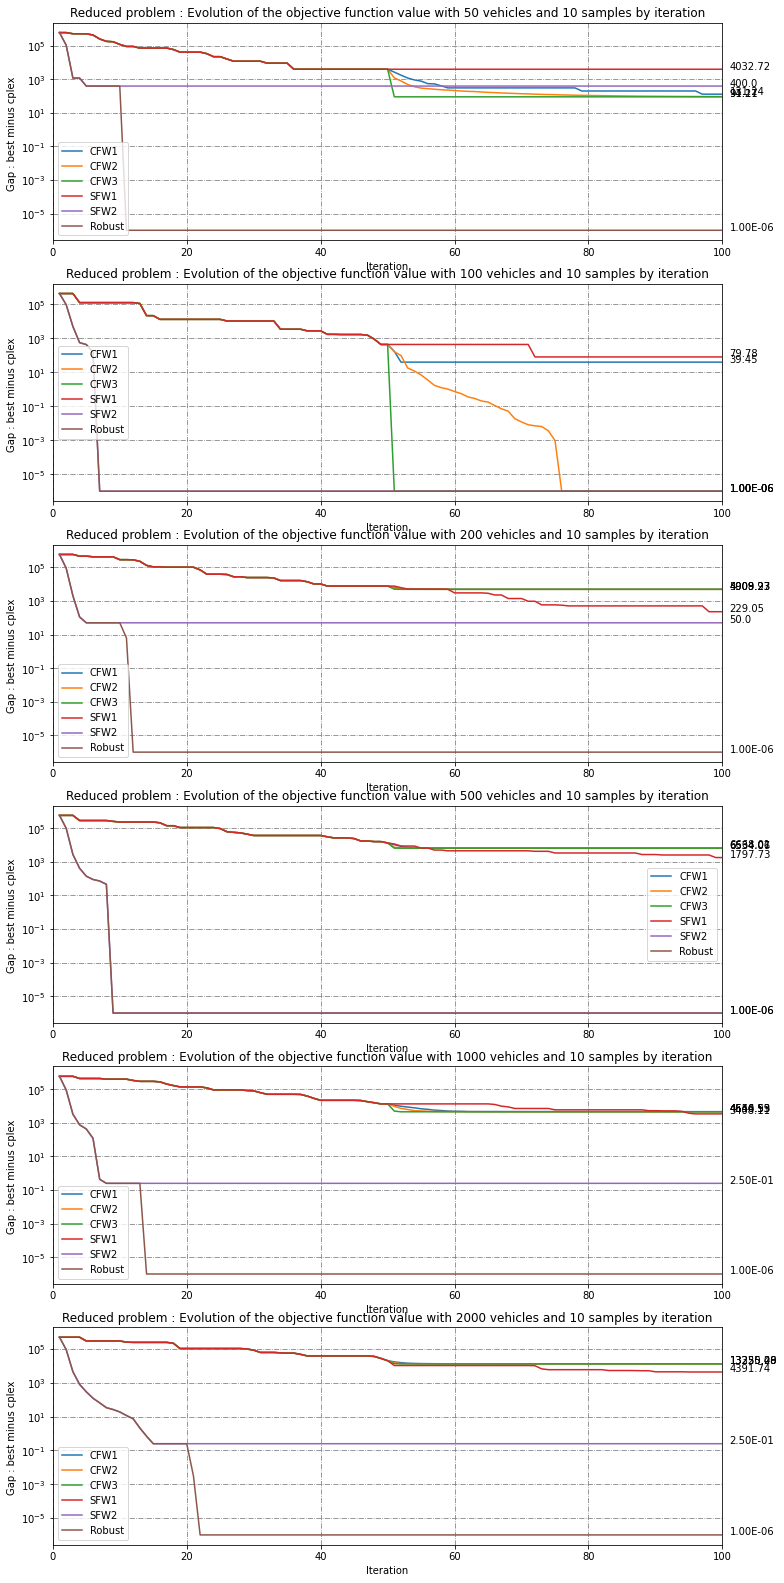

In [9]:
fig, axes = plt.subplots(6,1, figsize=(12, 28 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_reduced[cpt]["best_score"][99],data_CFW2_reduced[cpt]["best_score"][99],data_CFW3_reduced[cpt]["best_score"][99],data_SFW1_reduced[cpt]["best_score"][99],data_SFW2_reduced[cpt]["best_score"][99],data_Robust_reduced[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    axes[cpt].set_yscale('log')
    points_CFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW1_reduced[cpt]["best_score"]-opt_val ]
    points_CFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW2_reduced[cpt]["best_score"]-opt_val ]
    points_CFW3_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW3_reduced[cpt]["best_score"]-opt_val ]
    points_SFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW1_reduced[cpt]["best_score"]-opt_val ]
    points_SFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW2_reduced[cpt]["best_score"]-opt_val ]
    points_Robust_reduced=[x if x>1e-6 else 1e-6 for x in data_Robust_reduced[cpt]["best_score"]-opt_val ]
    axes[cpt].plot([j for j in range(1,101)],points_CFW1_reduced,label="CFW1")
    axes[cpt].plot([j for j in range(1,101)],points_CFW2_reduced,label="CFW2")
    axes[cpt].plot([j for j in range(1,101)],points_CFW3_reduced,label="CFW3")
    axes[cpt].plot([j for j in range(1,101)],points_SFW1_reduced,label="SFW1")
    axes[cpt].plot([j for j in range(1,101)],points_SFW2_reduced,label="SFW2")
    axes[cpt].plot([j for j in range(1,101)],points_Robust_reduced,label="Robust")
    axes[cpt].grid(ls="-.", color='0.5')
    points=[100]*6
    final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99],points_Robust_reduced[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        axes[cpt].annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    axes[cpt].set_title("Reduced problem : Evolution of the objective function value with "+str(i)+" vehicles and "+str(10)+" samples by iteration")
    axes[cpt].set_xlabel("Iteration")
    axes[cpt].set_ylabel("Gap : best minus cplex ")
    axes[cpt].set_xlim(left=0, right=100)
    axes[cpt].legend()

    cpt+=1
# Display the figure
plt.show()

/Users/xinyuhuangmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6


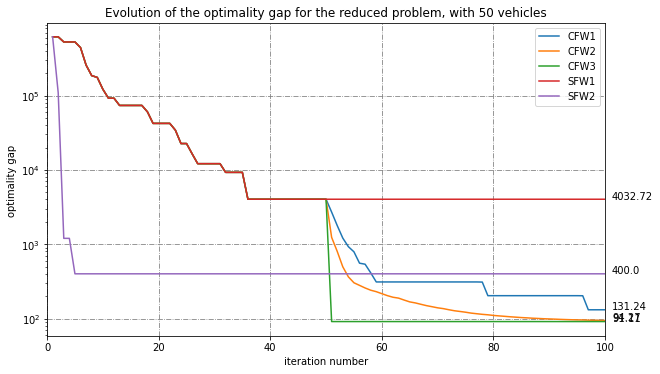

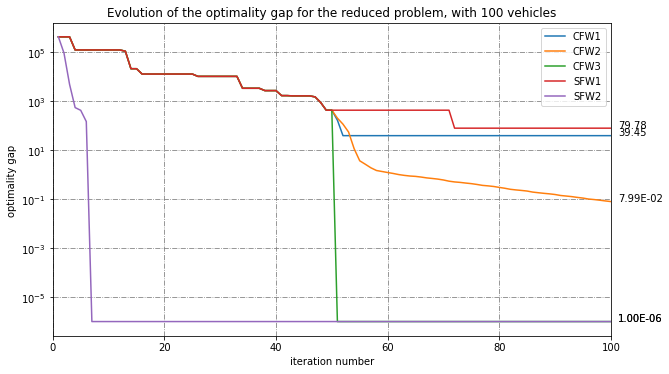

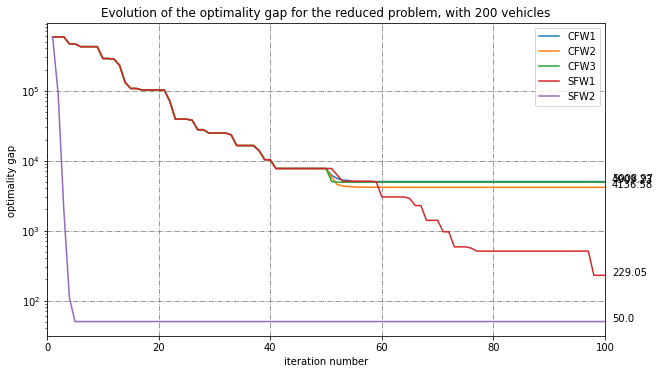

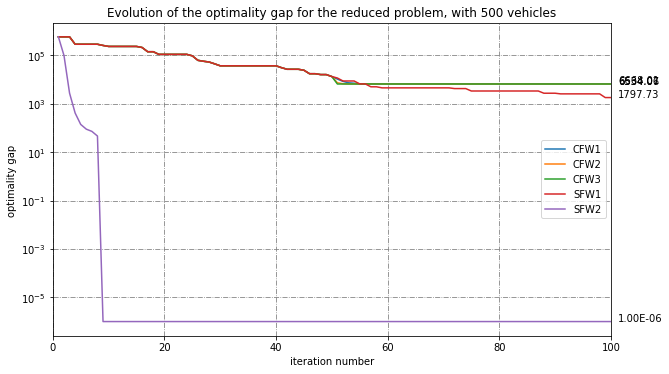

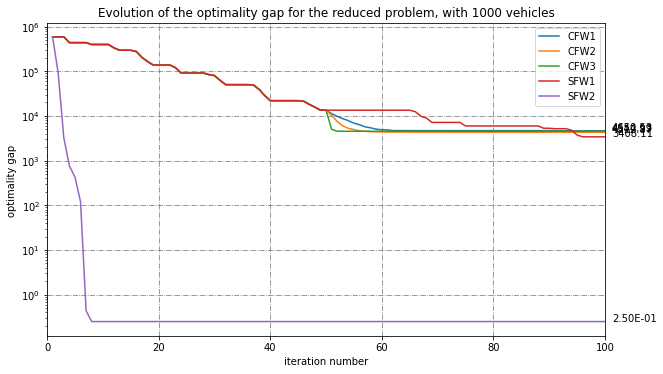

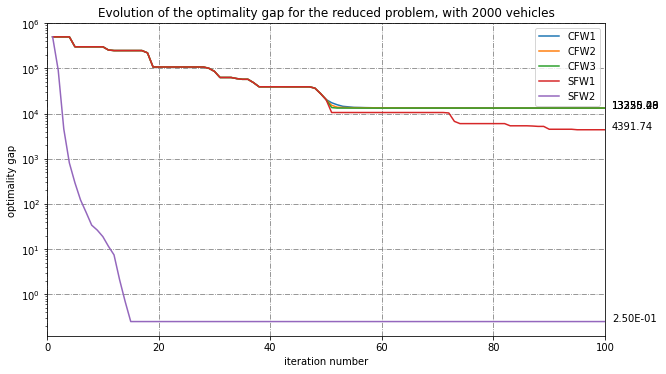

In [5]:
cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_reduced[cpt]["best_score"][99],data_CFW2_reduced[cpt]["best_score"][99],data_CFW3_reduced[cpt]["best_score"][99],data_SFW1_reduced[cpt]["best_score"][99],data_SFW2_reduced[cpt]["best_score"][99],data_Robust_reduced[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    plt.yscale('log')
    points_CFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW1_reduced[cpt]["best_score"]-opt_val ]
    points_CFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW2_reduced[cpt]["best_score"]-opt_val ]
    points_CFW3_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW3_reduced[cpt]["best_score"]-opt_val ]
    points_SFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW1_reduced[cpt]["best_score"]-opt_val ]
    points_SFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW2_reduced[cpt]["best_score"]-opt_val ]
    #points_Robust_reduced=[x if x>1e-6 else 1e-6 for x in data_Robust_reduced[cpt]["best_score"]-opt_val ]
    plt.plot([j for j in range(1,101)],points_CFW1_reduced,label="CFW1")
    plt.plot([j for j in range(1,101)],points_CFW2_reduced,label="CFW2")
    plt.plot([j for j in range(1,101)],points_CFW3_reduced,label="CFW3")
    plt.plot([j for j in range(1,101)],points_SFW1_reduced,label="SFW1")
    plt.plot([j for j in range(1,101)],points_SFW2_reduced,label="SFW2")
    #plt.plot([j for j in range(1,101)],points_Robust_reduced,label="Robust")
    plt.grid(ls="-.", color='0.5')
    points=[100]*6
    #final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99],points_Robust_reduced[99]]
    final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        plt.annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    plt.title("Evolution of the optimality gap for the reduced problem, with "+str(i)+" vehicles")
    plt.subplots_adjust(top=0.85)
    plt.xlabel("iteration number")
    plt.ylabel("optimality gap ")
    plt.legend(loc='upper right', bbox_to_anchor=(-5, 0))
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.xlim(left=0, right=100)
    plt.legend()
    plt.savefig("./result_zip/reduced_"+str(i)+".png",figsize=(20, 20), dpi=300)
    plt.show()
    cpt+=1
# Display the figure

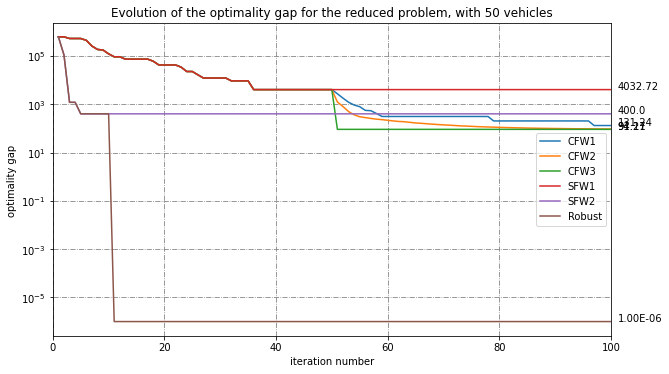

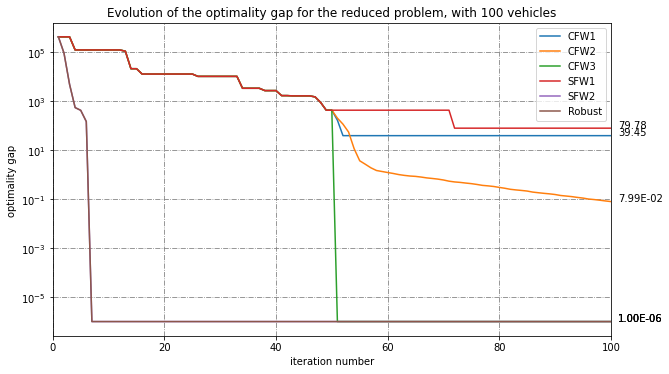

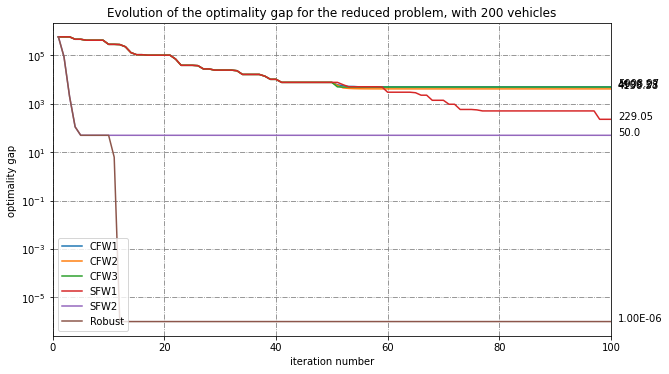

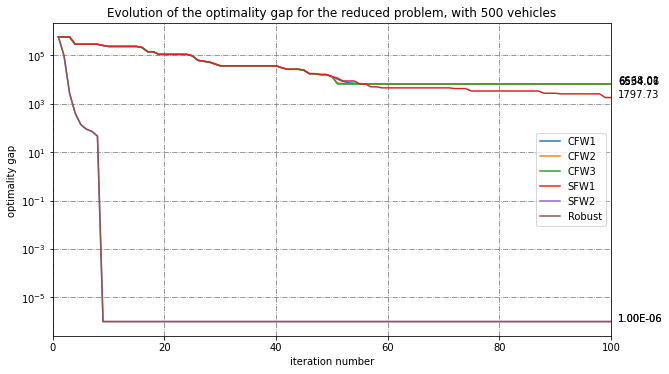

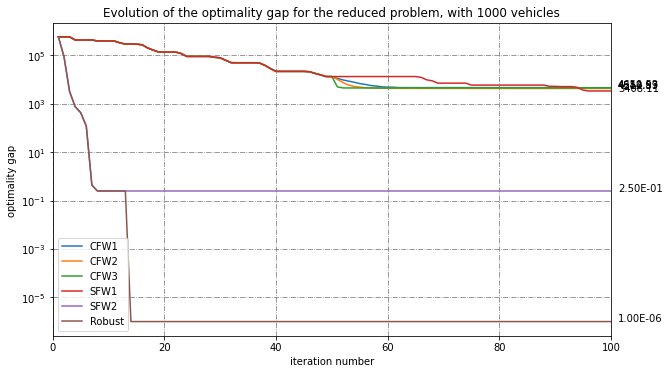

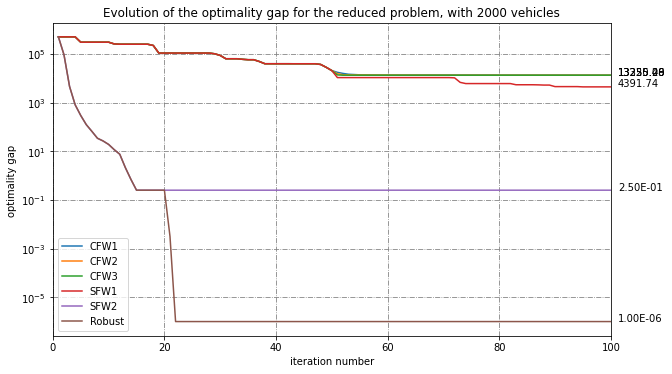

In [4]:
cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_reduced[cpt]["best_score"][99],data_CFW2_reduced[cpt]["best_score"][99],data_CFW3_reduced[cpt]["best_score"][99],data_SFW1_reduced[cpt]["best_score"][99],data_SFW2_reduced[cpt]["best_score"][99],data_Robust_reduced[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    plt.yscale('log')
    points_CFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW1_reduced[cpt]["best_score"]-opt_val ]
    points_CFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW2_reduced[cpt]["best_score"]-opt_val ]
    points_CFW3_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW3_reduced[cpt]["best_score"]-opt_val ]
    points_SFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW1_reduced[cpt]["best_score"]-opt_val ]
    points_SFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW2_reduced[cpt]["best_score"]-opt_val ]
    points_Robust_reduced=[x if x>1e-6 else 1e-6 for x in data_Robust_reduced[cpt]["best_score"]-opt_val ]
    plt.plot([j for j in range(1,101)],points_CFW1_reduced,label="CFW1")
    plt.plot([j for j in range(1,101)],points_CFW2_reduced,label="CFW2")
    plt.plot([j for j in range(1,101)],points_CFW3_reduced,label="CFW3")
    plt.plot([j for j in range(1,101)],points_SFW1_reduced,label="SFW1")
    plt.plot([j for j in range(1,101)],points_SFW2_reduced,label="SFW2")
    plt.plot([j for j in range(1,101)],points_Robust_reduced,label="Robust")
    plt.grid(ls="-.", color='0.5')
    points=[100]*6
    final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99],points_Robust_reduced[99]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        plt.annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    plt.title("Evolution of the optimality gap for the reduced problem, with "+str(i)+" vehicles")
    plt.subplots_adjust(top=0.85)
    plt.xlabel("iteration number")
    plt.ylabel("optimality gap ")
    plt.legend(loc='upper right', bbox_to_anchor=(-5, 0))
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.xlim(left=0, right=100)
    plt.legend()
    #plt.savefig("./result_zip/reduced_"+str(i)+".png",figsize=(20, 20), dpi=300)
    plt.show()
    cpt+=1
# Display the figure

In [5]:
time_cplex=[0.5474612712860107,2.5555331707000732,3.689321994781494,20.874051094055176,103.75555300712585, 2238.9461629390717]
value_cplex=[2097.454055804185, 2099.9677695863484, 2103.983069157052, 4921.0730290360825, 2098.2025251658024, 2100.43584499495]

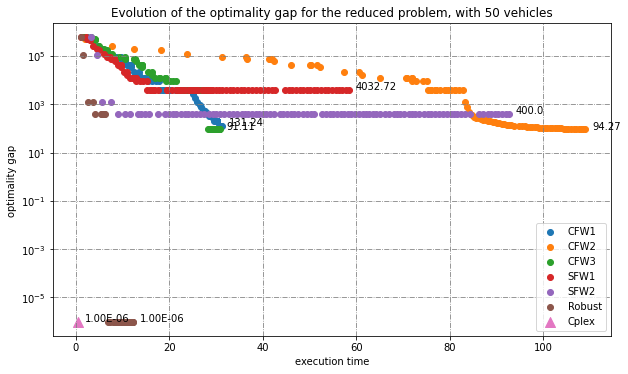

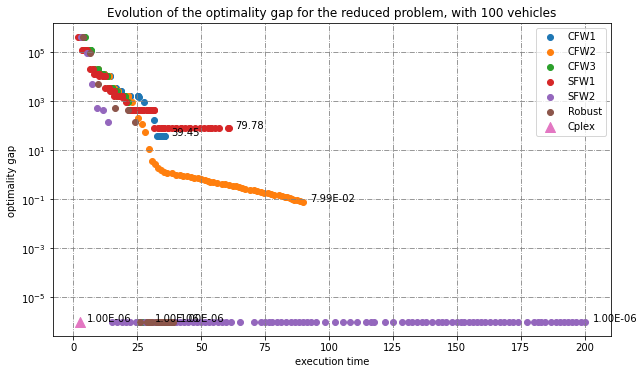

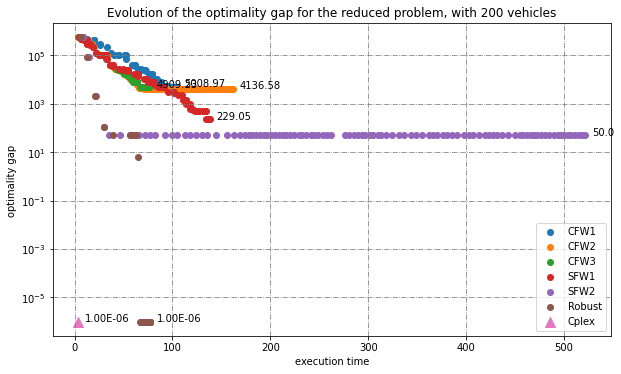

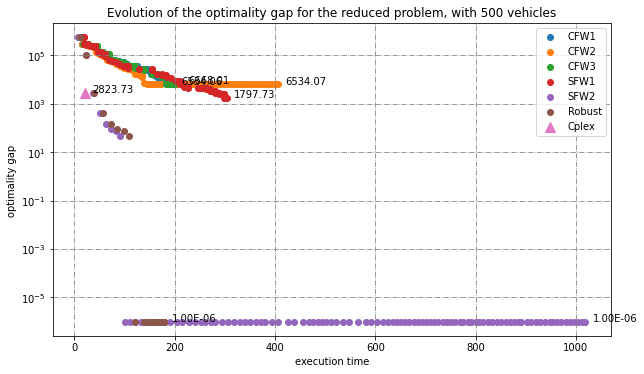

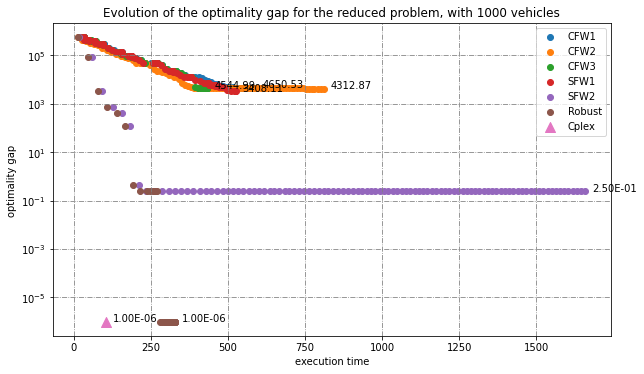

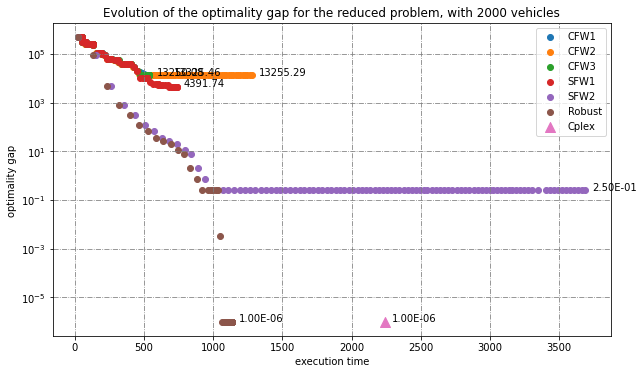

In [15]:
cpt=0
# Plot on each subplot
axes_y=0
for i in ([50, 100,200, 500, 1000, 2000]):
    my_instance="../data/instance_"+str(i)+".json"
    time, opt_val=read_cplexfile(my_instance)
    opt_val=min(opt_val,data_CFW1_reduced[cpt]["best_score"][99],data_CFW2_reduced[cpt]["best_score"][99],data_CFW3_reduced[cpt]["best_score"][99],data_SFW1_reduced[cpt]["best_score"][99],data_SFW2_reduced[cpt]["best_score"][99],data_Robust_reduced[cpt]["best_score"][99])
    #axes[cpt].yscale("log")
    plt.yscale('log')
    points_CFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW1_reduced[cpt]["best_score"]-opt_val ]
    points_CFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW2_reduced[cpt]["best_score"]-opt_val ]
    points_CFW3_reduced=[x if x>1e-6 else 1e-6 for x in data_CFW3_reduced[cpt]["best_score"]-opt_val ]
    points_SFW1_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW1_reduced[cpt]["best_score"]-opt_val ]
    points_SFW2_reduced=[x if x>1e-6 else 1e-6 for x in data_SFW2_reduced[cpt]["best_score"]-opt_val ]
    points_Robust_reduced=[x if x>1e-6 else 1e-6 for x in data_Robust_reduced[cpt]["best_score"]-opt_val ]
    point_cplex=[value_cplex[cpt]-opt_val if value_cplex[cpt]-opt_val>1e-6 else 1e-6 ]
    #print(points_Robust_reduced[cpt]["time"],"time")
    #print(points_CFW1_reduced)
    plt.scatter(data_CFW1_reduced[cpt]["time"],points_CFW1_reduced,label="CFW1")
    plt.scatter(data_CFW2_reduced[cpt]["time"],points_CFW2_reduced,label="CFW2")
    plt.scatter(data_CFW3_reduced[cpt]["time"],points_CFW3_reduced,label="CFW3")
    plt.scatter(data_SFW1_reduced[cpt]["time"],points_SFW1_reduced,label="SFW1")
    plt.scatter(data_SFW2_reduced[cpt]["time"],points_SFW2_reduced,label="SFW2")
    plt.scatter(data_Robust_reduced[cpt]["time"],points_Robust_reduced,label="Robust")
    plt.scatter(time_cplex[cpt],point_cplex,label="Cplex",marker="^",s=100)
    plt.grid(ls="-.", color='0.5')
    points=[data_CFW1_reduced[cpt]["time"][99],data_CFW2_reduced[cpt]["time"][99],data_CFW3_reduced[cpt]["time"][99],data_SFW1_reduced[cpt]["time"][99],data_SFW2_reduced[cpt]["time"][99],data_Robust_reduced[cpt]["time"][99],time_cplex[cpt]]
    final=[points_CFW1_reduced[99],points_CFW2_reduced[99],points_CFW3_reduced[99],points_SFW1_reduced[99],points_SFW2_reduced[99],points_Robust_reduced[99],point_cplex[0]]
    for points,final in zip(points,final):
        if final>1:
            r=str((round(final, 2)))
        else:
            r=("{0:.2E}".format(final))
        plt.annotate( str(r), xy=(points, final), xytext=(7, 0), textcoords='offset points')
    plt.title("Evolution of the optimality gap for the reduced problem, with "+str(i)+" vehicles")
    plt.subplots_adjust(top=0.85)
    plt.xlabel("execution time")
    plt.ylabel("optimality gap ")
    plt.legend(loc='upper right', bbox_to_anchor=(-5, 0))
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    #plt.xlim(left=0, right=100)
    plt.legend()
    #plt.savefig("./result_zip/reduced_"+str(i)+".png",figsize=(20, 20), dpi=300)
    plt.show()
    cpt+=1
# Display the figure

In [22]:
print(data_Robust_reduced[0]["time"])

0       24.388232
1      129.819791
2      230.280918
3      320.610775
4      400.953982
         ...     
95    1135.743228
96    1136.348447
97    1136.959181
98    1137.566537
99    1138.171882
Name: time, Length: 100, dtype: float64


In [23]:
print([x if x>1e-6 else 1e-6 for x in data_Robust_reduced[0]["best_score"]-opt_val ])

[617500.0000000002, 109374.85617694167, 1200.0000000002183, 1200.0000000002183, 400.0000000002183, 400.0000000002183, 400.0000000002183, 400.0000000002183, 400.0000000002183, 400.0000000002183, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]
